In [1]:
# imports
import sys  
sys.path.insert(0, '../../../TwitterCoordinatedInorganicAgents')

import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoModel
from transformers import AutoTokenizer
import numpy as np
from tweetcore.tasks.postgres_target import download_data
from tweetcore.tasks.classification_task.classification_utils import make_report, bagging_models  
from data_builders.tasks import collapse_embeddings
import credentials_refactor
import global_settings as gs
import gc

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
import tensorflow as tf

# model utils
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import fbeta_score, make_scorer, accuracy_score, f1_score, roc_auc_score, accuracy_score, precision_score, recall_score, classification_report, roc_curve, auc, confusion_matrix, precision_recall_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from category_encoders import leave_one_out, cat_boost, target_encoder
from scipy.special import softmax

# Getting data

In [6]:
# data
conf = credentials_refactor.return_credentials()
data = download_data.pandas_df_from_postgre_query(configuration = conf ,
                                                  query = '''
                                                          select case when number_tweets > 300 then 300 
                                                                      else number_tweets end as number_tweets,
                                                                 target
                                                          from redacted_tables.tweets_text_classification
                                                          order by random()
                                                          limit 100000
                                                          ''')

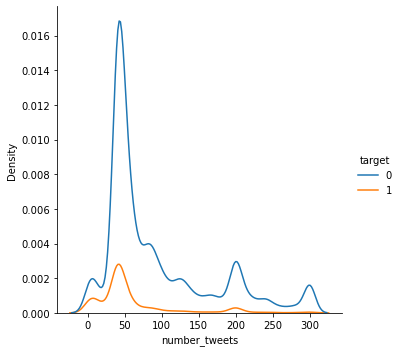

In [8]:
sns.displot(data=data, x="number_tweets", hue='target', kind='kde')